In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Exploratory Data Analysis

df = pd.read_csv('Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Check the Data to see what columns you have avaiable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
#Looking at this statistics it shows 4 columns which tell me that majority of my data is not numerical.

#Since majority data is not numerical, I will need to create dummy variables

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
#Before you want to explore the different features first need to make sure there is no missing data or NaN values

df.isna().sum()

#All zeros indicate nothing in the data is "null"

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

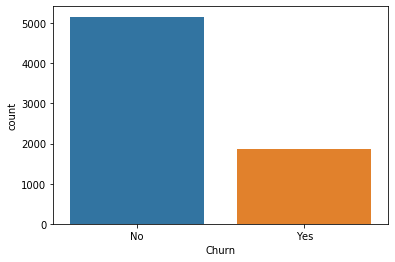

In [6]:
#DATA Visualizations

#Displaying the balance of the class labels (Churn) with a countplot

sns.countplot(data=df,x='Churn')

In [7]:
#Getting the values of the above graph an easy way

df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

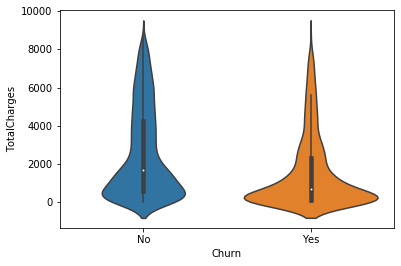

In [8]:
#Creating a violin plot of the distribution of Total Charges between the Churn categories

sns.violinplot(data=df,x='Churn',y='TotalCharges')

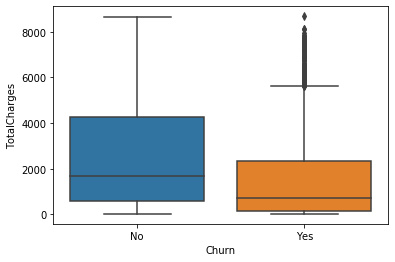

In [9]:
#Boxplot of the above graph

sns.boxplot(data=df,x='Churn',y='TotalCharges')

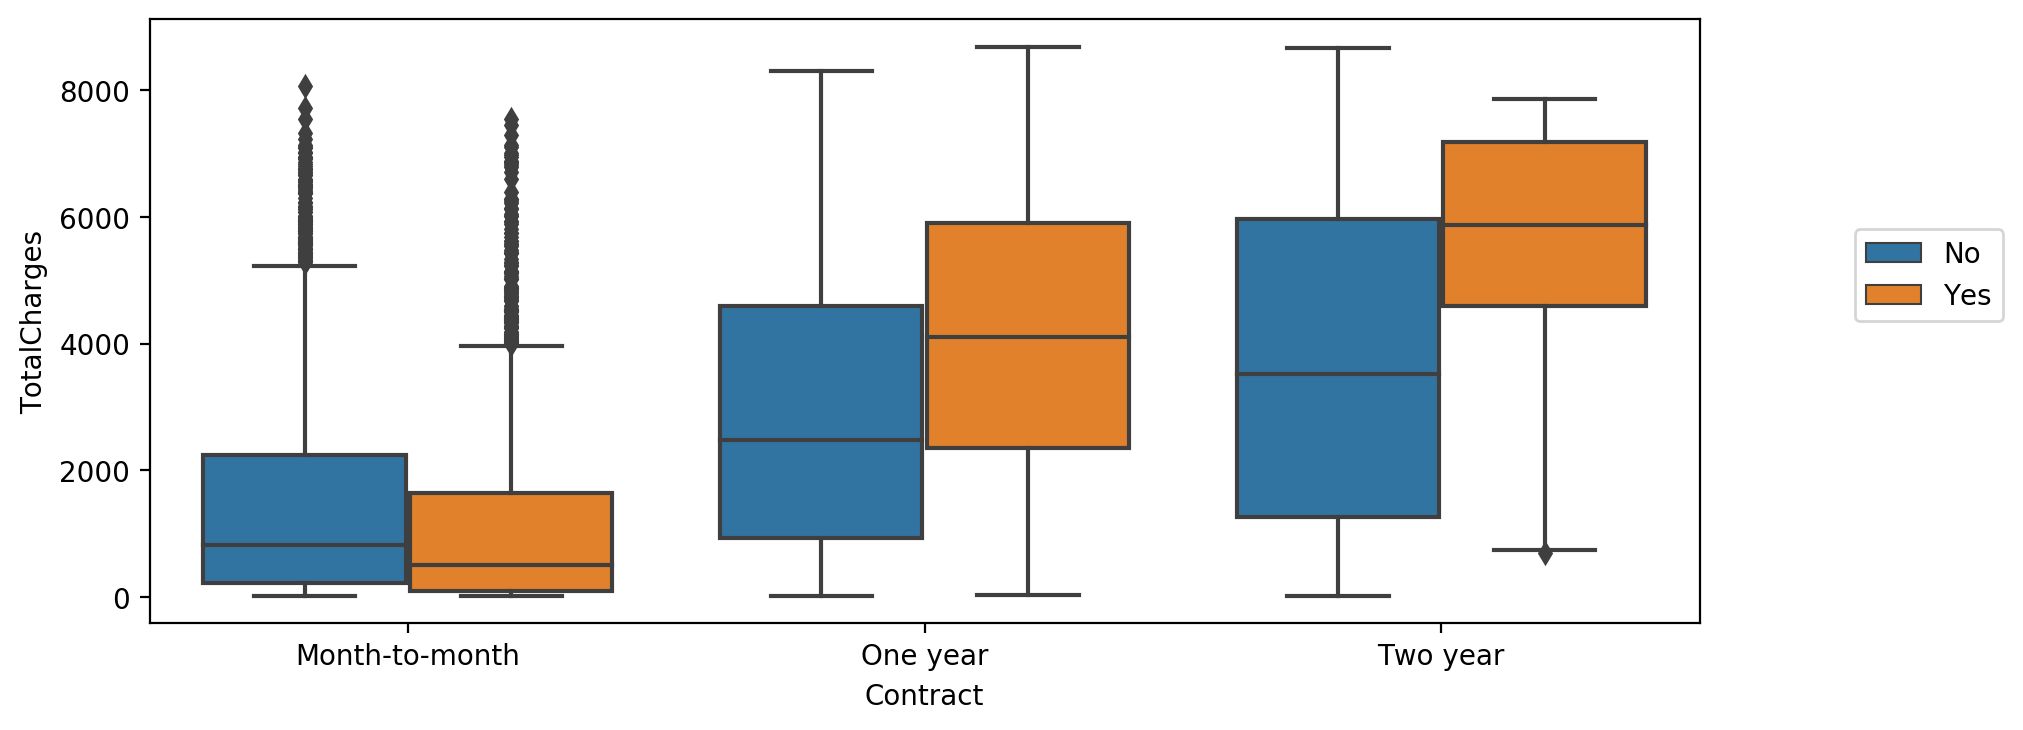

In [10]:
#Creating a boxplot of Total Charges being distributed per Contract type

plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x='Contract',y='TotalCharges', hue='Churn')

#Moving the legend
plt.legend(loc=(1.1,0.5))


#This plot is showing people who got 1 year contracts and did churn had a overall higher total charges

#Customers churn because they were getting charged higher in that one year or two year contract than other customers

In [11]:
#Create a bar plot that shows correlation between some features and to the class label.

#Calculate correlation for numeric features

#Step 1 is creating dummy variables
#Adding ".corr()" to the line of code at the bottom allows you to create your dummy variables and get the correlation


pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [12]:
#Since we are only interested in the "Churn_yes" correlation we will grab the "Churn_yes" colum

corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

corr_df['Churn_Yes']

#This is how all the features in the data set are correlated to "Churn_Yes"

SeniorCitizen                              0.150541
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
OnlineSecurity_No                          0.342235
OnlineSecurity_No internet service        -0.227578
OnlineSecurity_Yes                        -0.171270
OnlineBackup_No                            0.267595
OnlineBackup_No internet service          -0.227578
OnlineBackup_Yes                          -0.082307
DeviceProtection_No                        0.252056
DeviceProtec

In [13]:
#Sorting the values to get a good view of what features is doing what

#It doesnt make sense to say that "churn_Yes" is 100% correlated and "Churn_NO" is 0% so we get rid of first and last rows

corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [14]:
#Creating a barplot

corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]


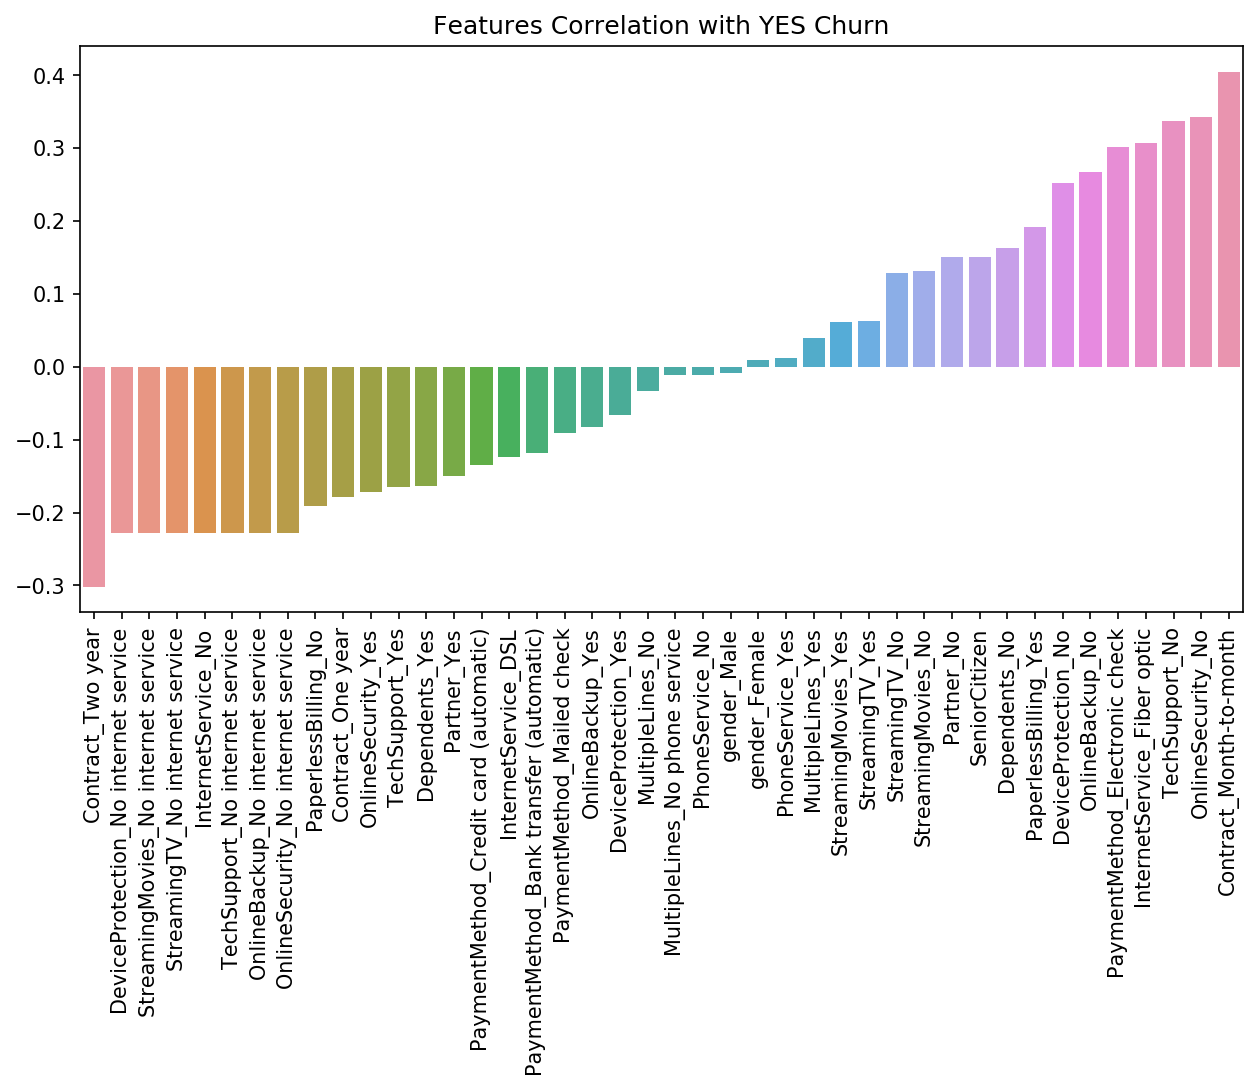

In [15]:
plt.figure(figsize=(10,5),dpi=150)

plt.title("Features Correlation with YES Churn")

sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)

plt.xticks(rotation=90);

In [16]:
#Churn Analysis

#What are the 3 types of contract avaiable

df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
#Tenure is someone who had a tenure for an approximate lengh of time in months

df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

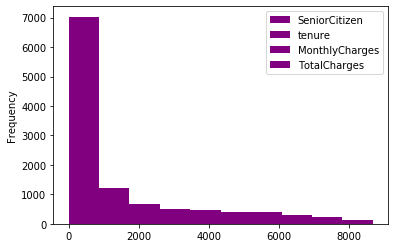

In [18]:
df.plot(kind='hist',color='purple')

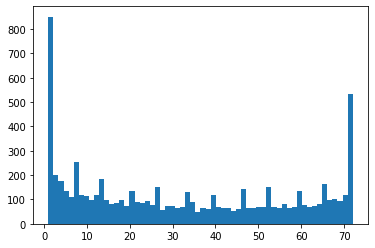

In [19]:
#How to plot an histogram using Matplotlib instead of seaborn.

#Seaborn is better to use

plt.hist(df["tenure"],bins=60);

In [20]:
#The below line of code should work and display an displot that which tenures are associated with 1 or the 3 types
#of contracts and all that is split up between yes and no churns

#sns.displot(data=df, x='tenure', bins=70, col='Contract', rows='Churn')

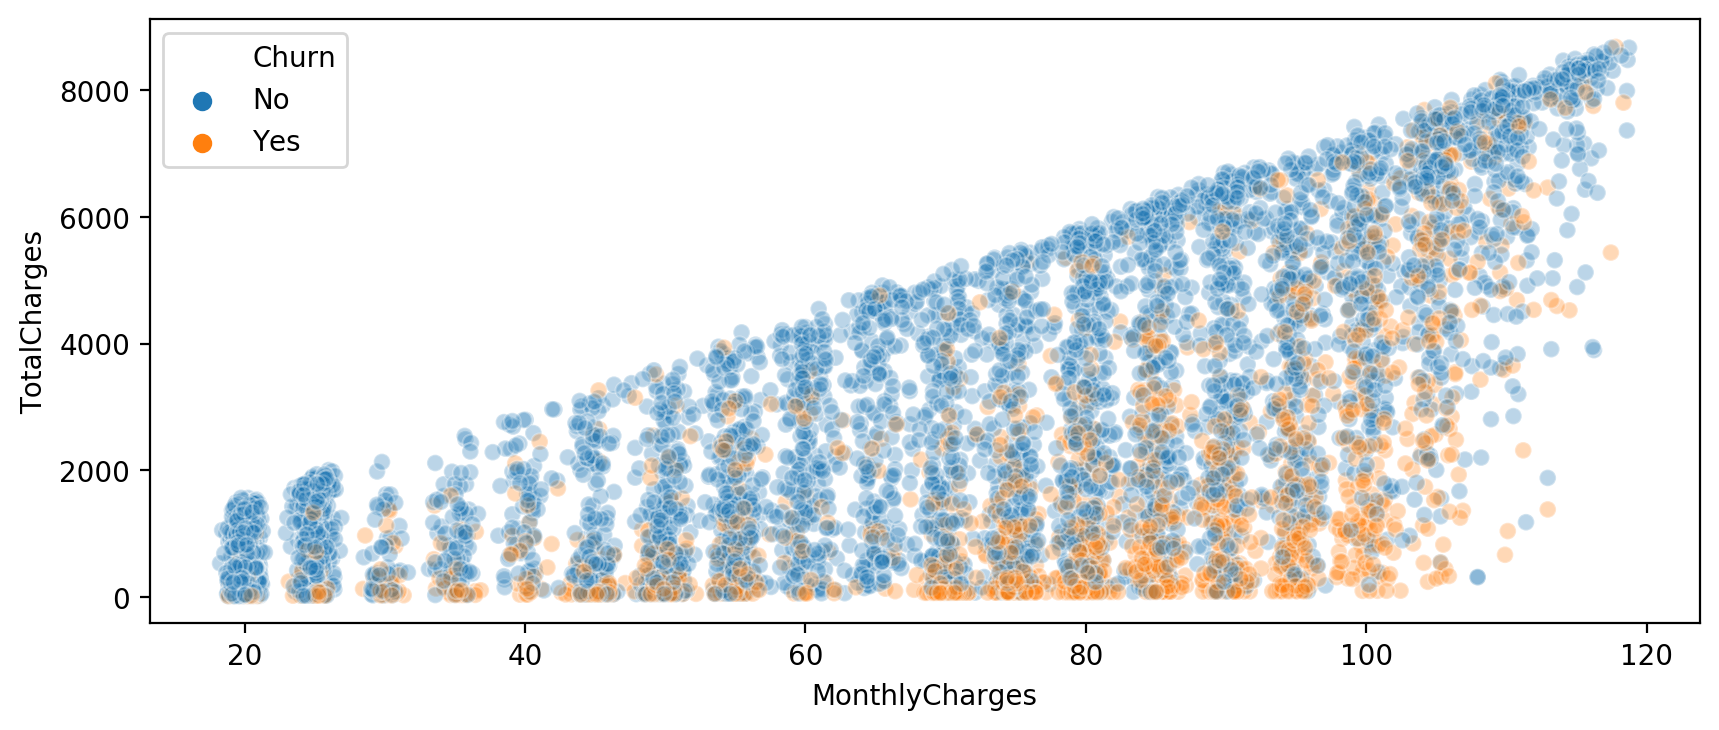

In [21]:
#How to display a scatter plot of total charges vs monthly chargers and a color distinguished by churn


plt.figure(figsize= (10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.3)

#Alpha parameter was used because as you can see with out the alpha parameter there are points on top of each other

In [22]:
#Creating a Cohort based on tenure and churn

#Step 1 = group your data by Chrun and Tenure
#Step 2 = get a value or count of yes and no
#Step 3 = make data easier to read
#Step 4 = grab everything under the "yes" data

df.groupby(['Churn','tenure']).count().transpose()['Yes']

#How to read this chart (There are 94 people who did churn at tenure 3 months)

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [23]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [24]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [25]:
#How to calculate the percentage of people that did churn

100*yes_churn / (no_churn + yes_churn)

#For the people who have a tenure of 3 months, 47 percent of them will churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [26]:
churn_rate = 100*yes_churn / (no_churn + yes_churn)

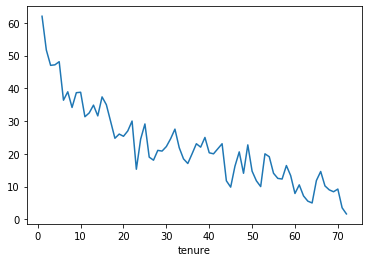

In [27]:
#Getting the Churn rate of a single column

#If you do not transpose this dataset then you need to grab the specfic row not column like in this example

churn_rate.transpose()['customerID'].plot()

#The ".plot()" command gives you the graph we are looking for

In [28]:
#Create a new column called Tenure Cohort based off of the tenure column in the dataset

def cohort (tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [29]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [30]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


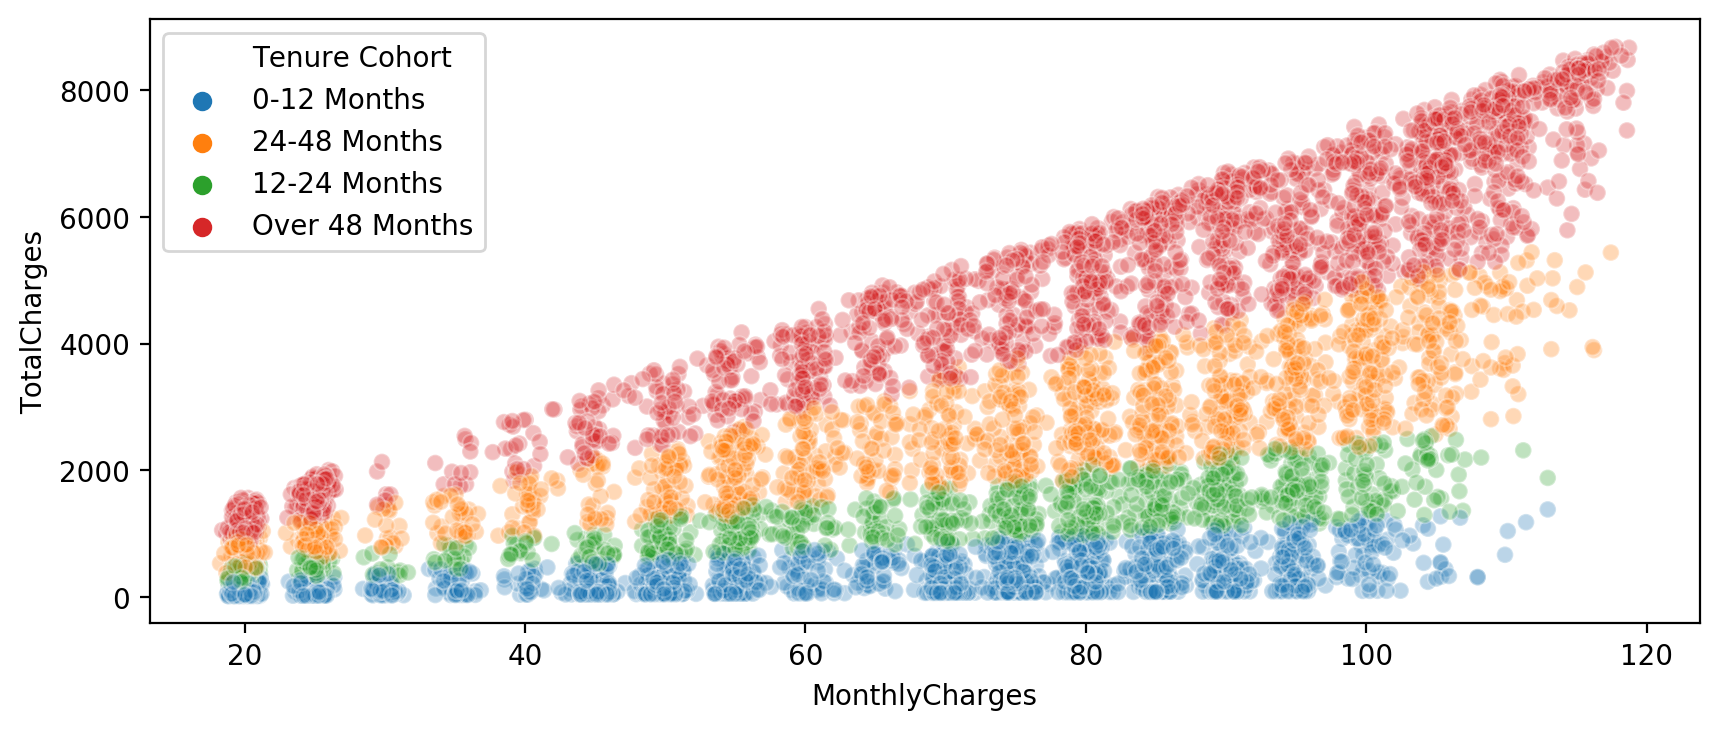

In [31]:
plt.figure(figsize= (10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.3)

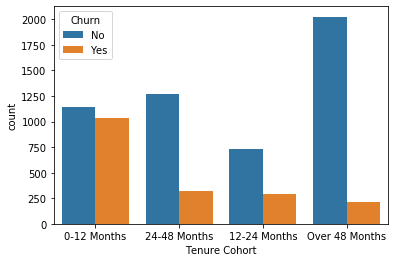

In [32]:
#Creating a count plot

sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

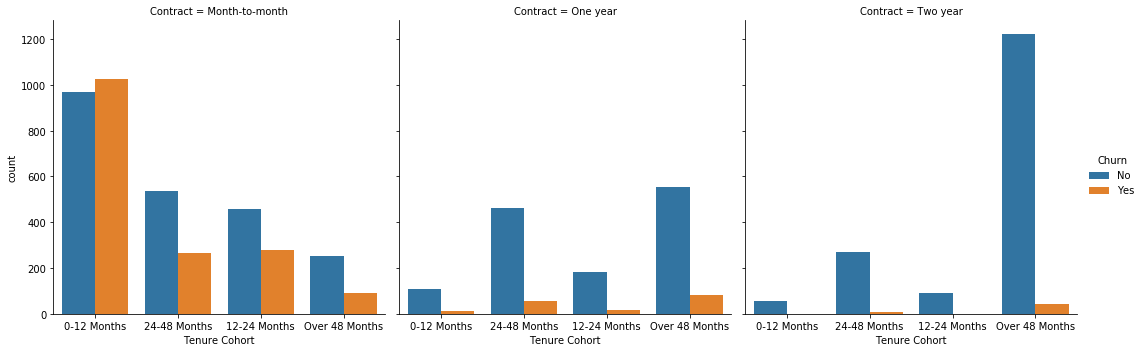

In [33]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract')

In [34]:
#Predictive Modeling

df

#looking at the data with out doing anything you can see that it has both numerical and categorical variables
#Since it has categorical variables we will need to use "get dummies"
#The columns "CustomerID" is a unique identifier like the index so we need to make sure that column is not included

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24 Months
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Over 48 Months
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Months
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Months


In [35]:
X = df.drop(['Churn', 'customerID'], axis=1)

In [36]:
X = pd.get_dummies(X, drop_first = True)

In [37]:
y = df['Churn']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier(max_depth=6)

In [41]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [43]:
preds = dt.predict(X_test)

In [44]:
print(classification_report(y_test,preds))

#The model performed well with the "No churns" cause there are more data points (instances) for no churn vs yes churn
#look at next line of code to verify y

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.62      0.48      0.54       530

    accuracy                           0.80      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.80      0.79      2110



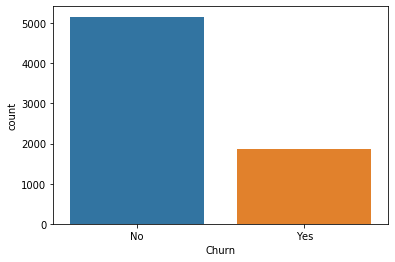

In [45]:
#count yes churn vs no churn
sns.countplot(data=df,x='Churn')

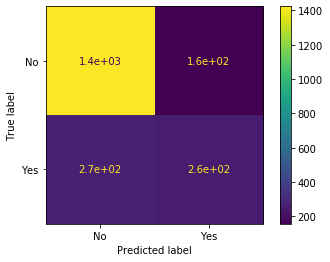

In [46]:
plot_confusion_matrix(dt,X_test,y_test)

#This graph shows that the model is saying people will churn when in reality that they wont churn is 160
#This graph shows that the model is saying people will not churn when in reality that they will chrun is 270

In [47]:
#How to calculate feature importance

#Step 1 Create a DataFrame

imp_feat = pd.DataFrame(data=dt.feature_importances_, index = X.columns, columns = ['Important Features'])

In [48]:
imp_feat = imp_feat.sort_values("Important Features")

In [49]:
imp_feat = imp_feat[imp_feat['Important Features']>0]

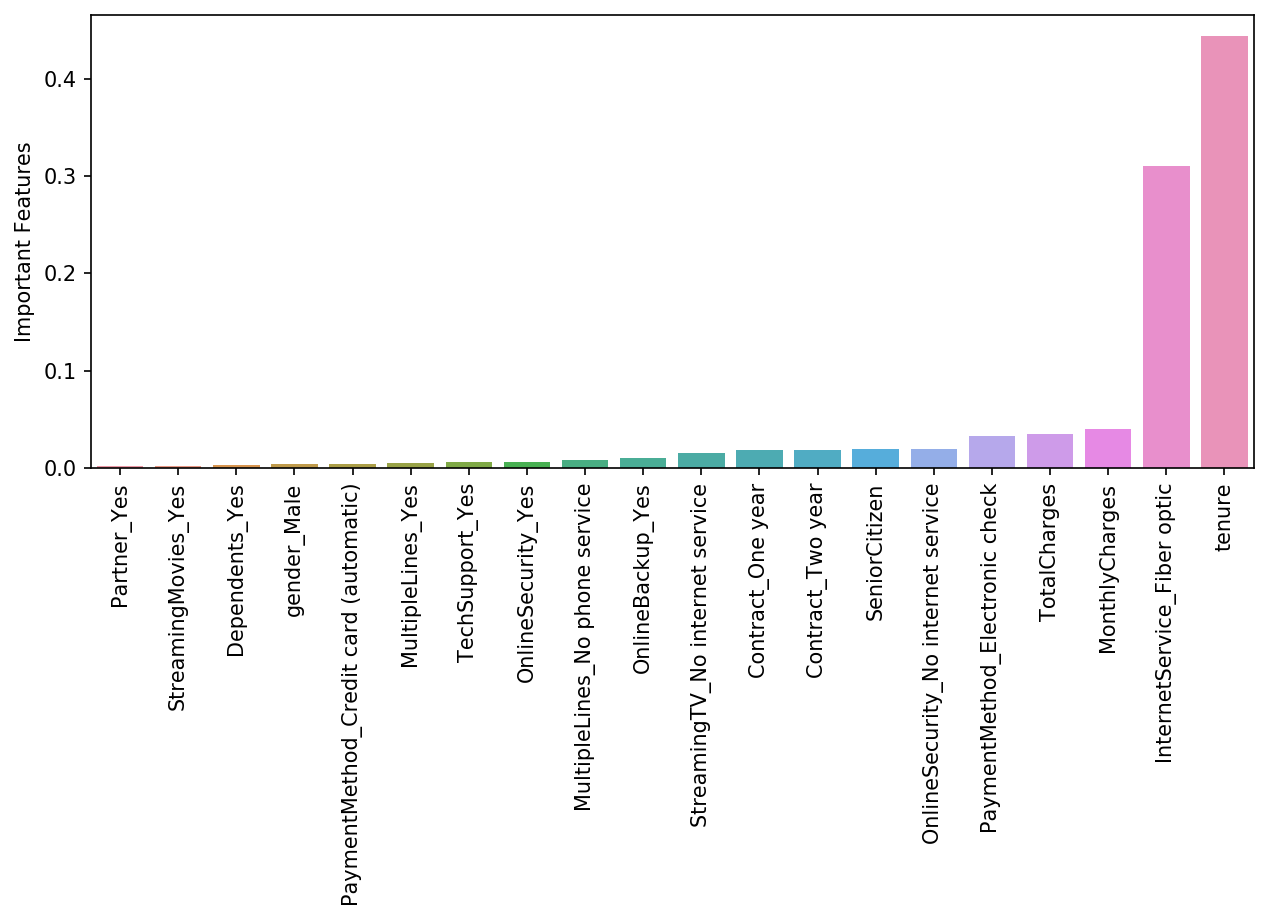

In [50]:
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(data=imp_feat, x = imp_feat.index, y = 'Important Features')
plt.xticks(rotation=90);

In [51]:
#How to plot a tree

from sklearn.tree import plot_tree

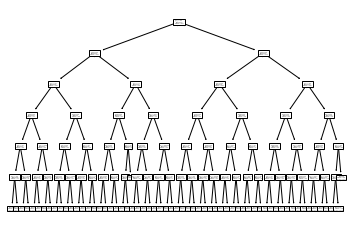

In [52]:
plot_tree(dt);

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(max_depth=6)

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
predictions = rf.predict(X_test)

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.84      0.91      0.88      1580
         Yes       0.66      0.49      0.56       530

    accuracy                           0.81      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.80      0.81      0.80      2110



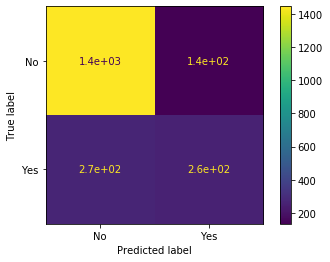

In [58]:
plot_confusion_matrix(rf,X_test,y_test)

#Looking at this plot compared to the last plot.. 280 people were miss classified vs 270 in the last plot

#This suggest that the random forest model is perfroming worse than the single decision tree model and we should perform a
#Grid Search

In [59]:
#Boosted trees

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [60]:
ada_model = AdaBoostClassifier()

gb_model = GradientBoostingClassifier()

In [61]:
ada_model.fit(X_train,y_train)

gb_model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
ada_preds = ada_model.predict(X_test)

gb_preds = gb_model.predict(X_test)

In [63]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1580
         Yes       0.63      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [64]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.65      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



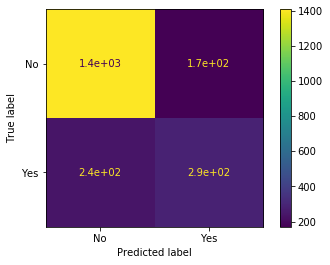

In [65]:
plot_confusion_matrix(ada_model,X_test,y_test)

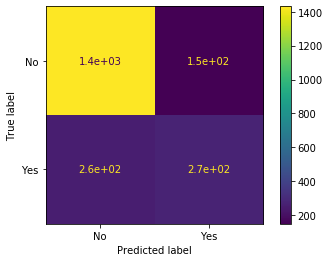

In [66]:
plot_confusion_matrix(gb_model,X_test,y_test)